# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_22176\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_excel(r"D:\IGAC_2024\Procesamiento\Diagnostico_ZH_Vigent\BD\ZHG_Vigentes\MERGE_R_ZHG.xlsx")

In [3]:
df.head()

,OBJECTID,CODIGO,CODIGO_ZON,VALOR_HECT,SUBZONA_FI,VIGENCIA,codigo_mun,CODIGO_DEP,MpCodigo,MpNombre,Depto,ha
0,17583,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,7677.129630
1,17584,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,1446.459227
2,23190,6850200,6,NaN,21-31-52-54-10-23-09-12-01,2015-01-01 00:00:00,68502,68,68502,Onzaga,Santander,9.197183
3,23191,6850200,6,NaN,21-31-52-54-10-23-09-12-01,2015-01-01 00:00:00,68502,68,68502,Onzaga,Santander,6.966764
4,23192,6850200,6,NaN,21-31-52-54-10-23-09-12-01,2015-01-01 00:00:00,68502,68,68502,Onzaga,Santander,6.464312


In [4]:
# Duplicates
duplicates=df.duplicated().sum()
print(duplicates)

0


In [12]:
df['VALOR_HECT'] = df['VALOR_HECT'].astype(float)
df.info()

ValueError: could not convert string to float: ' '

In [6]:
df.isnull().sum()

OBJECTID       0
CODIGO         0
CODIGO_ZON     0
VALOR_HECT    13
SUBZONA_FI     0
VIGENCIA       0
codigo_mun     0
CODIGO_DEP     0
MpCodigo       0
MpNombre       0
Depto          0
ha             0
dtype: int64

In [8]:
df_sin_nulos = df.dropna(subset=['VALOR_HECT'])
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32847 entries, 0 to 32859
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    32847 non-null  int64  
 1   CODIGO      32847 non-null  int64  
 2   CODIGO_ZON  32847 non-null  int64  
 3   VALOR_HECT  32847 non-null  object 
 4   SUBZONA_FI  32847 non-null  object 
 5   VIGENCIA    32847 non-null  object 
 6   codigo_mun  32847 non-null  int64  
 7   CODIGO_DEP  32847 non-null  int64  
 8   MpCodigo    32847 non-null  int64  
 9   MpNombre    32847 non-null  object 
 10  Depto       32847 non-null  object 
 11  ha          32847 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 3.3+ MB


In [9]:
df_sin_nulos

,OBJECTID,CODIGO,CODIGO_ZON,VALOR_HECT,SUBZONA_FI,VIGENCIA,codigo_mun,CODIGO_DEP,MpCodigo,MpNombre,Depto,ha
0,17583,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,7677.129630
1,17584,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,1446.459227
15,1,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,2153.850884
16,2,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,983.154785
17,3,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,2.784532
...,...,...,...,...,...,...,...,...,...,...,...,...
32855,25157,6867900,13,0,,2013-01-01 00:00:00,68679,68,68679,San Gil,Santander,124.575012
32856,25158,6867900,13,0,,2013-01-01 00:00:00,68679,68,68679,San Gil,Santander,215.189122
32857,25159,6867900,13,0,,2013-01-01 00:00:00,68679,68,68679,San Gil,Santander,11.861376
32858,25160,6867900,13,0,,2013-01-01 00:00:00,68679,68,68679,San Gil,Santander,951.976912


ValueError: could not convert string to float: ' '

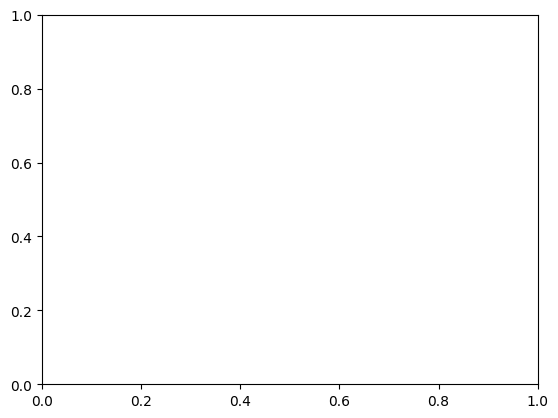

In [11]:
df_sin_nulos.plot.scatter(x='VALOR_HECT', y='ha')

In [ ]:
#df_sin_nulos.to_excel(r"D:\IGAC_2024\Procesamiento\Diagnostico_ZH_Vigent\BD\ZHG_Vigentes\MERGE_U_ZHG_cleaning.xlsx",index=False)

In [13]:
df2=pd.read_excel(r"D:\IGAC_2024\Procesamiento\Diagnostico_ZH_Vigent\BD\Municipios_coor.xls")

In [14]:
df2.head()

,FID,MpCodigo,Long,Lat
0,0,91540,-70.472980,-3.625750
1,1,91001,-70.042484,-3.518948
2,2,91798,-70.003243,-2.449756
3,3,91263,-72.724195,-1.989620
4,4,91536,-71.148579,-1.902512


In [15]:
#Unir DF
df_zhg_coor = pd.merge(df_sin_nulos, df2, left_on='codigo_mun', right_on='MpCodigo')

In [16]:
df_zhg_coor.head()

,OBJECTID,CODIGO,CODIGO_ZON,VALOR_HECT,SUBZONA_FI,VIGENCIA,codigo_mun,CODIGO_DEP,MpCodigo_x,MpNombre,Depto,ha,FID,MpCodigo_y,Long,Lat
0,17583,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,7677.129630,1072,44855,-72.986336,10.494713
1,17584,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,44855,Urumita,La Guajira,1446.459227,1072,44855,-72.986336,10.494713
2,1,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,2153.850884,952,13006,-74.478054,8.622946
3,2,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,983.154785,952,13006,-74.478054,8.622946
4,3,1300600,1,,,30/12/1899,13006,13,13006,Achí,Bolívar,2.784532,952,13006,-74.478054,8.622946


In [19]:
#Delete Columns
#df_zhg_coor=df_zhg_coor.drop(columns = ["MpCodigo_x","FID","MpCodigo_y"])
df_zhg_coor.head()

,OBJECTID,CODIGO,CODIGO_ZON,VALOR_HECT,SUBZONA_FI,VIGENCIA,codigo_mun,CODIGO_DEP,MpNombre,Depto,ha,Long,Lat
0,17583,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,Urumita,La Guajira,7677.129630,-72.986336,10.494713
1,17584,4485500,10,250000,"6p,9p",2008-01-01 00:00:00,44855,44,Urumita,La Guajira,1446.459227,-72.986336,10.494713
2,1,1300600,1,,,30/12/1899,13006,13,Achí,Bolívar,2153.850884,-74.478054,8.622946
3,2,1300600,1,,,30/12/1899,13006,13,Achí,Bolívar,983.154785,-74.478054,8.622946
4,3,1300600,1,,,30/12/1899,13006,13,Achí,Bolívar,2.784532,-74.478054,8.622946


In [20]:
df_zhg_coor.to_excel(r"D:\IGAC_2024\Procesamiento\Diagnostico_ZH_Vigent\BD\ZHG_Vigentes\MERGE_R_ZHG_Coor.xlsx",index=False)